# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

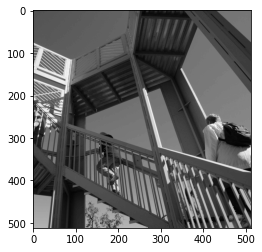

In [3]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

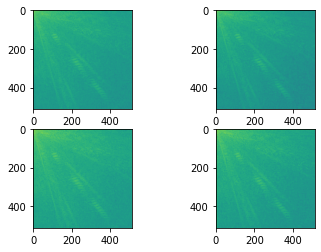

In [4]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

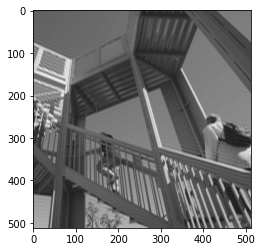

In [5]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

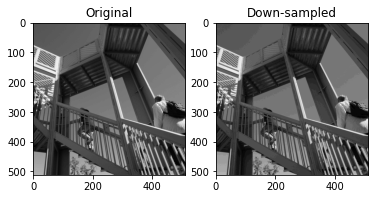

In [6]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

In [30]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

ValueError: operands could not be broadcast together with shapes (8,8,3) (8,8) 

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

### Problema 1
Completați algoritmul JPEG incluzând toate blocurile din imagine.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn

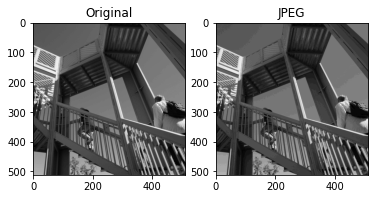

In [32]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

def mini_matrices(a):
    a_flat = a.flatten()
    length = len(a_flat)

    new_matrices = []

    for i in range(0, length, 64):
        try:
            new_matrices.append(a_flat[i:i+64].reshape((8,8)))
        except:
            break
    remaining = a_flat[-(length%64):] 
    
    return new_matrices, remaining

def JPEG(X_jpeg):
    width = X_jpeg.shape[0]
    height = X_jpeg.shape[1]
    x,remaining = mini_matrices(X_jpeg)  # breaking up the original image in multiple 8x8 and storing them in x
    y = []  # storing all 8x8 from x after we apply DCT transform 
    y_jpeg = []  # encoded 8x8
    x_jpeg = []  # decoded 8x8
    y_nnz = []  # all of 8x8s frequencies before dither
    y_jpeg_nnz = []  # all of 8x8s frequencies after dither
    for i in range(len(x)):
        y.append(dctn(x[i]))
        y_nnz.append(np.count_nonzero(y[i]))  # componente frecventa inainte de cuantizare
        # Encoding
        y_jpeg.append(Q_jpeg*np.round(y[i])/Q_jpeg)
        y_jpeg_nnz.append(np.count_nonzero(y_jpeg[i]))  # componente frecventa dupa cuantizare
        # Decoding
        x_jpeg.append(idctn(y_jpeg[i]))
    k = 0
    photo_jpeg = np.zeros((width, height))
    for block in x_jpeg:
        for line in block:
            for x in line:
                photo_jpeg[k // height][k % height] = x
                k += 1
    return photo_jpeg


X = misc.ascent()
# Down-sampling
Q_down = 10
X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down)

image = JPEG(X_jpeg)

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(image, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

### Problema 2
Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

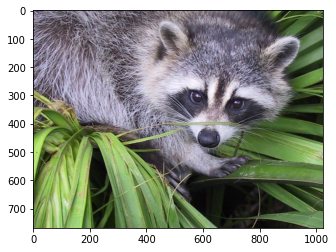

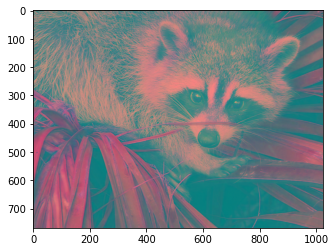

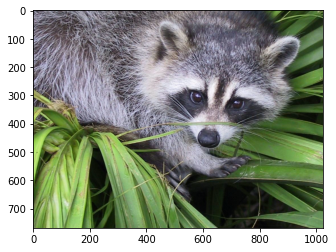

In [41]:
def JPEG_Color(X_jpeg):
    X_ycbcr = rgb2ycbcr(X_jpeg)
    Cr = JPEG(X_ycbcr[:,:,0])
    Cb = JPEG(X_ycbcr[:,:,1])
    y = JPEG(X_ycbcr[:,:,2])
    image = np.array([Cr, Cb, y])
    image = np.uint8(image.transpose(1, 2, 0))
    return ycbcr2rgb(image)

def rgb2ycbcr(im):
    cbcr = np.empty_like(im)
    r = im[:,:,0]
    g = im[:,:,1]
    b = im[:,:,2]
    # Y
    cbcr[:,:,0] = .299 * r + .587 * g + .114 * b
    # Cb
    cbcr[:,:,1] = 128 - .169 * r - .331 * g + .5 * b
    # Cr
    cbcr[:,:,2] = 128 + .5 * r - .419 * g - .081 * b
    return np.uint8(cbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

X = misc.face()
X_ycbcr_jpeg = rgb2ycbcr(X)
image = JPEG_Color(X)

plt.imshow(X)
plt.show()

plt.imshow(X_ycbcr_jpeg)
plt.show()

plt.imshow(image)
plt.show()


### Problema 3
Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

First ideal MSE: 0.061838602038812446 
Tried to zip ~510 times


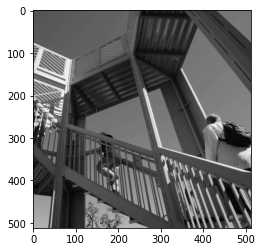

In [42]:
X = misc.ascent()
Y2 = dctn(X, type=2)
k = 0

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)
ideal_MSE = 0.09

MSE = (np.square(X - X_ziped)).mean(axis=None)
while(MSE > ideal_MSE and k < len(Y2) + 1):
    k += 1
    Y_ziped = Y2.copy()
    Y_ziped[k:] = 0
    X_ziped = idctn(Y_ziped)
    MSE = (np.square(X - X_ziped)).mean(axis=None)
else:
    if k < len(Y2):
        print("First ideal MSE:", MSE,"\nTried to zip ~" + str(k) + " times")
        plt.imshow(X_ziped, cmap=plt.cm.gray)
        plt.show()
    else:
        print("Can't get a lower MSE than:", f"{MSE:.16f}" + ". Zipped %d times."%k)


### Problema 4

Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

In [44]:
import cv2
import os
vidcap = cv2.VideoCapture('clip.mp4')
success,image = vidcap.read()
frames = []
count = 0

while success:
      print(f"Success: {count}")
      count += 1
      image = JPEG_Color(image)
      frames.append(image)
      success,image = vidcap.read()
      if not success:
            break
      height, width, layers = image.shape
      size = (width,height)


fourcc = cv2.VideoWriter_fourcc(*'mp4v')
compressed = cv2.VideoWriter('compressed.mp4',fourcc, 23.98, size)
for x in frames:
      img = JPEG_Color(x)
      cv2.imshow('Frame', img)
      compressed.write(img)
      
compressed.release()
vidcap.release()


file_size = os.path.getsize('compressed.mp4')
print("Compressed File Size is :", file_size, "bytes")

Success: 0
Success: 1
Success: 2
Success: 3
Success: 4
Success: 5
Success: 6
Success: 7
Success: 8
Success: 9
Success: 10
Success: 11
Success: 12
Success: 13
Success: 14
Success: 15
Success: 16
Success: 17
Success: 18
Success: 19
Success: 20
Success: 21
Success: 22
Success: 23
Success: 24
Success: 25
Success: 26
Success: 27
Success: 28
Success: 29
Success: 30
Success: 31
Success: 32
Success: 33
Success: 34
Success: 35
Success: 36
Success: 37
Success: 38
Success: 39
Success: 40
Success: 41
Success: 42
Success: 43
Success: 44
Success: 45
Success: 46
Success: 47
Success: 48
Success: 49
Success: 50
Success: 51
Success: 52
Success: 53
Success: 54
Success: 55
Success: 56
Success: 57
Success: 58
Success: 59
Success: 60
Success: 61
Success: 62
Success: 63
Success: 64
Success: 65
Success: 66
Success: 67
Success: 68
Success: 69
Success: 70
Success: 71
Success: 72
Success: 73
Success: 74
Success: 75
Success: 76
Success: 77
Success: 78
Success: 79
Success: 80
Success: 81
Success: 82
Success: 83
Su